<a href="https://colab.research.google.com/github/josefernandezest98/training/blob/main/SAM/SAM_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segment Anything Meta-AI (SAM)

## 1. SAM download and installation

In [1]:
!wget -p https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
!pip install git+https://github.com/facebookresearch/segment-anything.git

--2023-10-06 06:17:25--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.162.163.34, 3.162.163.11, 3.162.163.51, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.162.163.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth’

dl.fbaipublicfiles. 100%[===================>]   2.39G   241MB/s    in 16s     

2023-10-06 06:17:41 (155 MB/s) - ‘dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]

FINISHED --2023-10-06 06:17:41--
Total wall clock time: 16s
Downloaded: 1 files, 2.4G in 16s (155 MB/s)
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-dasdjkqe
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-

## 2. Libraries

In [2]:
# usual
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

# SAM library
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

## 3. Functions

In [3]:
# Function: shows masks provided by SAM
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

## 4. Main

In [4]:
# Downloading Bamburgh castle picture
!wget https://raw.githubusercontent.com/josefernandezest98/training/main/SAM/bamburgh.jpg

--2023-10-06 06:18:04--  https://raw.githubusercontent.com/josefernandezest98/training/main/SAM/bamburgh.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63910 (62K) [image/jpeg]
Saving to: ‘bamburgh.jpg’

bamburgh.jpg        100%[===================>]  62.41K  --.-KB/s    in 0.02s   

2023-10-06 06:18:04 (2.91 MB/s) - ‘bamburgh.jpg’ saved [63910/63910]



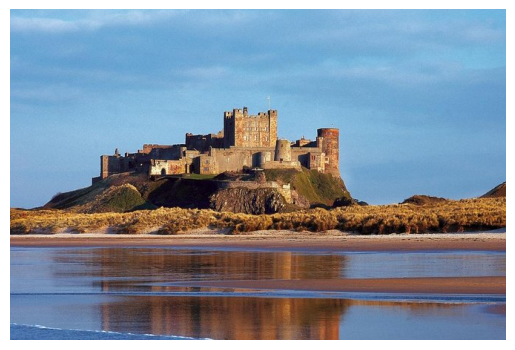

In [5]:
# Read of the image (Bamburgh Castle)
image = cv2.imread('bamburgh.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Showing the image
plt.figure()
plt.imshow(image)
plt.axis('off')
plt.show()

In [6]:
# Colab T GPU

sam_checkpoint = "dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth"
model_type = "vit_h"

cuda0 = torch.device('cuda:0')

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=cuda0)

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-31): 32 x Block(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d

In [7]:
# SAM perform
mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(image)

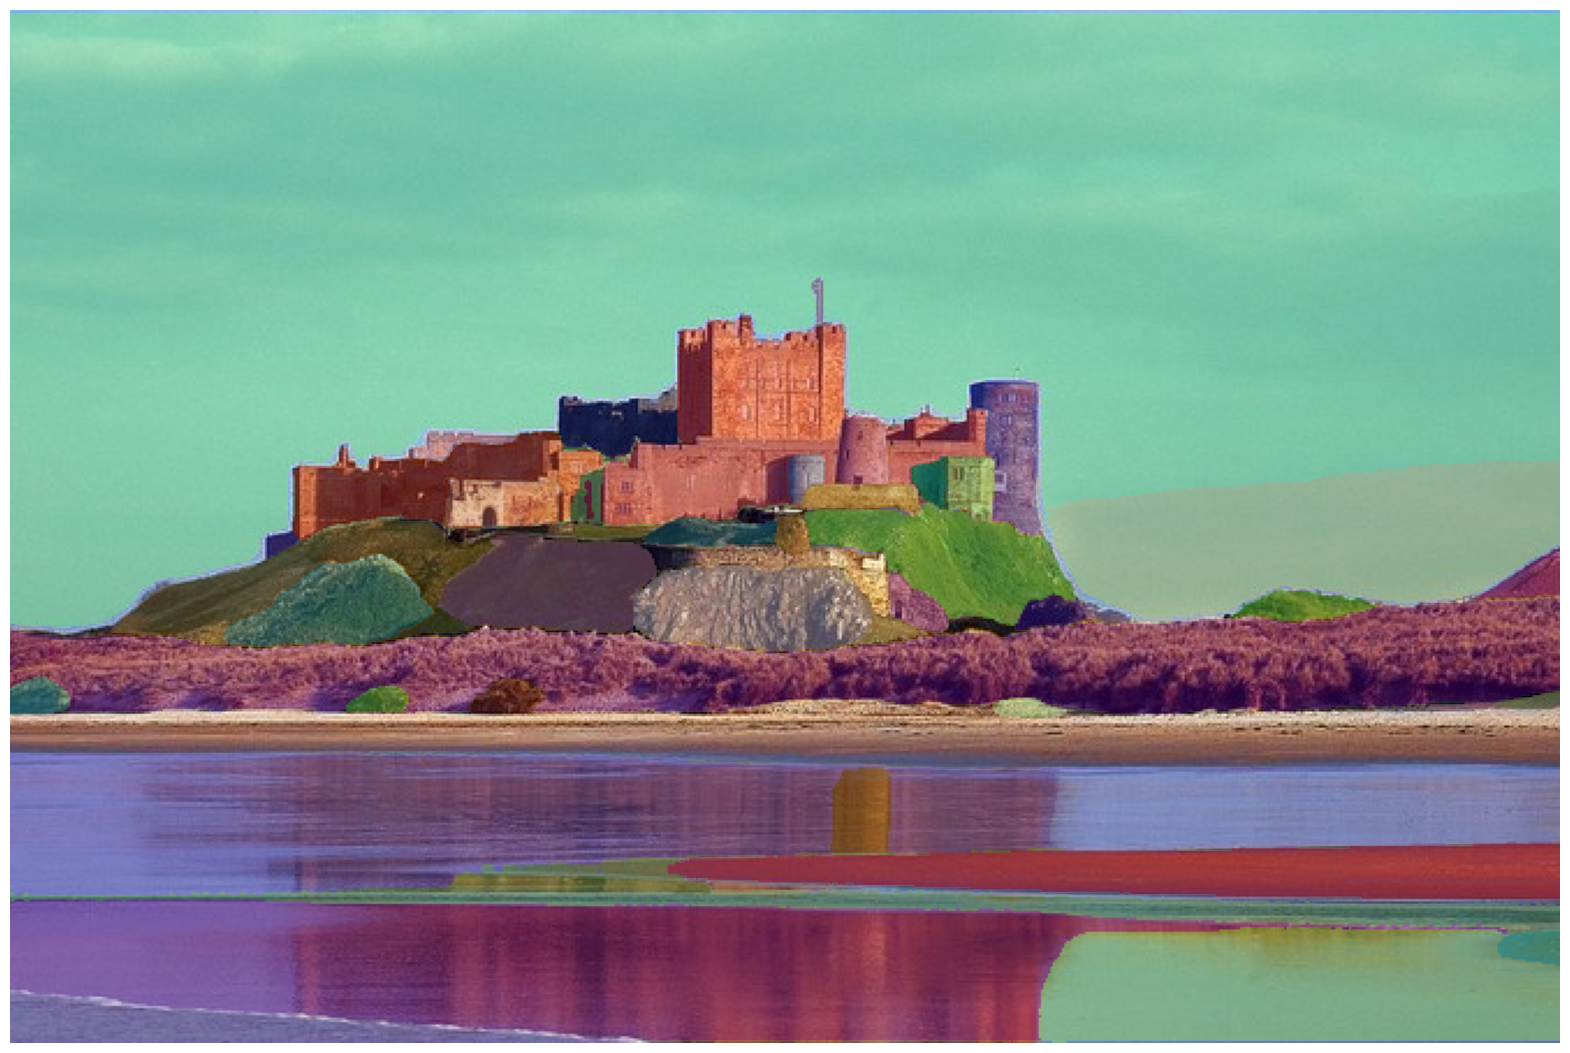

In [8]:
# Masks plot
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()

In [9]:
# Logging GPU tracking

In [10]:
%%writefile gpu_usage.sh
#! /bin/bash
#comment: run for 10 seconds, change it as per your use
end=$((SECONDS+50))

while [ $SECONDS -lt $end ]; do
    nvidia-smi --format=csv --query-gpu=timestamp,power.draw,utilization.gpu,memory.used,memory.free,fan.speed,temperature.gpu >> gpu.log
    #comment: or use below command and comment above using #
    #nvidia-smi dmon -i 0 -s mu -d 1 -o TD >> gpu.log
done

Writing gpu_usage.sh


In [11]:
%%bash --bg

bash gpu_usage.sh

In [12]:
# Downloading road picture
!wget https://raw.githubusercontent.com/josefernandezest98/training/main/SAM/road.jpg

--2023-10-06 06:18:33--  https://raw.githubusercontent.com/josefernandezest98/training/main/SAM/road.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48526 (47K) [image/jpeg]
Saving to: ‘road.jpg’

road.jpg            100%[===================>]  47.39K  --.-KB/s    in 0.01s   

2023-10-06 06:18:33 (3.80 MB/s) - ‘road.jpg’ saved [48526/48526]



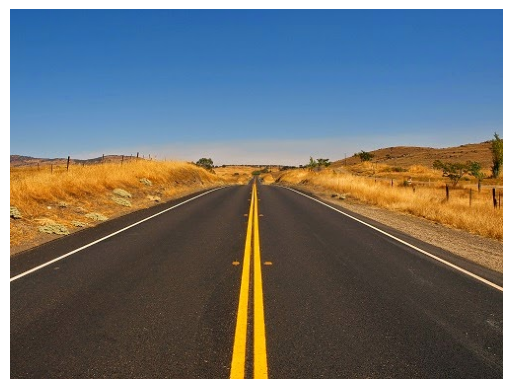

In [13]:
# Read of the image (Bamburgh Castle)
image = cv2.imread('road.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Showing the image
plt.figure()
plt.imshow(image)
plt.axis('off')
plt.show()

In [14]:
# Colab T GPU

sam_checkpoint = "dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth"
model_type = "vit_h"

cuda0 = torch.device('cuda:0')

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=cuda0)

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-31): 32 x Block(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d

Performing time: 19 seconds

In [15]:
# SAM perform
mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(image)

Performing time: 6 seconds

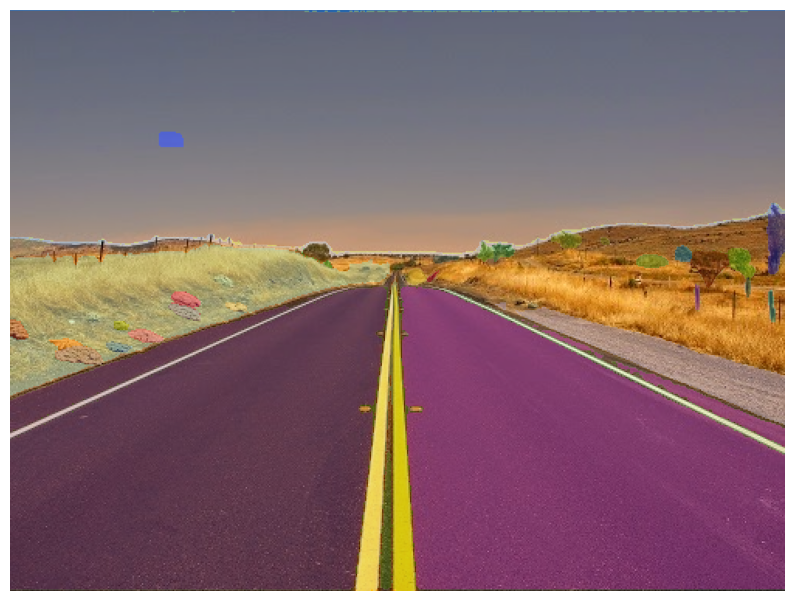

In [16]:
# Masks plot
plt.figure(figsize=(10,10))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()

In [17]:
!nvidia-smi --query-gpu=timestamp,name,pci.bus_id,driver_version,pstate,pcie.link.gen.max,pcie.link.gen.current,temperature.gpu,utilization.gpu,utilization.memory,memory.total,memory.free,memory.used --format=csv -l 5

timestamp, name, pci.bus_id, driver_version, pstate, pcie.link.gen.max, pcie.link.gen.current, temperature.gpu, utilization.gpu [%], utilization.memory [%], memory.total [MiB], memory.free [MiB], memory.used [MiB]
2023/10/06 06:19:15.229, Tesla T4, 00000000:00:04.0, 525.105.17, P0, 3, 3, 62, 0 %, 0 %, 15360 MiB, 6646 MiB, 8455 MiB




---



